# 使用神经网络实现线性回归

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

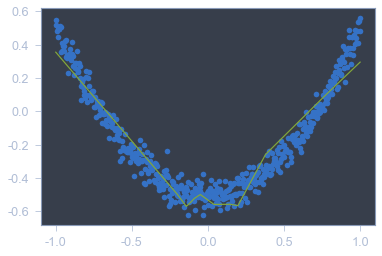

In [8]:
tf.reset_default_graph()

################################ Generate data #################################
sample_rows = 500
sample_cols = 1
X = np.linspace(-1, 1, sample_rows * sample_cols, dtype=np.float32)
X = X.reshape((sample_rows, sample_cols))
# noise is normal distribution. mean is 0, standard deviation
noise = np.random.normal(loc=0, scale=0.05, size=X.shape)
y = np.square(X) - 0.5 + noise

iterative_num = 100

############################## Global Parameters ###############################
learning_rate = 0.1

def add_one_layer_nn(input,
                    out_size,
                    activation_function=None):
    input_shape = input.get_shape().as_list()
    W = tf.Variable(tf.random_normal(shape=[input_shape[1], out_size]))
    b = tf.Variable(tf.constant(0.1, shape=[1, out_size]))
    f = tf.add(tf.matmul(input, W), b)
    
    if activation_function is None:
        return f
    
    return activation_function(f)  

############################### Structure Graph ################################
X_batch = tf.placeholder(tf.float32, [None, sample_cols])
y_batch = tf.placeholder(tf.float32, [None, sample_cols])

# create neural network
h1_layer = add_one_layer_nn(X_batch, 10, activation_function=tf.nn.relu)
output_layer = add_one_layer_nn(h1_layer, 1)
# Loss function
loss_op = tf.reduce_mean(tf.reduce_sum(tf.square(output_layer-y_batch),
                                       axis=1))
# Optimizer (Gradient Descent)
optimize_op = (tf.train
               .GradientDescentOptimizer(learning_rate=learning_rate)
               .minimize(loss_op))
# Initial Operator
init_op = tf.global_variables_initializer()

################################ Execute Graph #################################
with tf.Session() as sess:
    writer = tf.summary.FileWriter('../graphs', sess.graph)
    sess.run(init_op)
    for i in range(iterative_num):
        _, loss = sess.run([optimize_op, loss_op],
                          feed_dict={X_batch: X, y_batch: y})
#         print(loss)
        if i == 99:
            result = sess.run(output_layer,
                             feed_dict={X_batch: X})
#     print(result)
    plt.plot(X, y, 'o')
    plt.plot(X, result)
    plt.savefig('../pics/AIE20_W03_HW_RL_with_nn_01')
    plt.show()


TensorBoard image

![](../pics/AIE20_W03_HW_RL_with_nn_00.png)

Fit image
![](../pics/AIE20_W03_HW_RL_with_nn_01.png)